In [1]:
import pandas as pd
import numpy as np
import nmslib

%load_ext autoreload
%autoreload 2
from matrix_factorization import Matrix_Factorization_V2

import seaborn as sns
import matplotlib.pylab as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing

# init value: set -200 as out of range value
OUT_OF_RANGE_RSSI = -200

# VBD DATA

In [2]:
beacons = ['Beacon00001', 'Beacon00002', 'Beacon00003', 'Beacon00004', 'Beacon00005', 'Beacon00006']
def preprocess_data(raw_data='training-vbd-floor1.json', beacons=beacons):
    rawdata_vbd_df = pd.read_json('training-vbd-floor1.json')
    data = []
    row_data = []
    for cell in rawdata_vbd_df.data.beacons:
        row_data = []
        row_data.append(cell['Y'])
        row_data.append(cell['X'])
        for beacon in beacons:
            row_data.append(int(cell[beacon]))
        data.append(row_data)
    columns = ['col', 'row'] + beacons
    # convert to dataframe
    rssi_dataset_df = pd.DataFrame(data, columns=columns)
    return rssi_dataset_df

# convert to dataframe
rssi_dataset_df = preprocess_data()
labeled_data = rssi_dataset_df[['col','row']].copy()
unlabeled_data = rssi_dataset_df[beacons].copy()
unlabeled_data.head()

,Beacon00001,Beacon00002,Beacon00003,Beacon00004,Beacon00005,Beacon00006
0,-64,-63,-71,-77,-69,-56
1,-60,-62,-71,-70,-68,-59
2,-66,-62,-74,-57,-64,-71
3,-67,-61,-76,-48,-72,-75
4,-68,-62,-76,-52,-69,-73


# RUN PCA CODE

In [3]:
# preprocessing
scaled_data = preprocessing.scale(unlabeled_data)
# run PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[-2.71861523e+00,  2.49608736e-01,  6.44202630e-01,
        -1.16306401e+00,  1.45124517e+00, -3.39759327e-01],
       [-2.20192567e+00,  2.59773347e-01,  8.54037316e-01,
        -9.39879842e-01,  3.93984737e-01,  9.00044711e-01],
       [ 1.65174124e+00,  2.84582125e-01,  1.11195986e+00,
        -5.04672729e-01, -7.26177749e-01,  8.64027057e-01],
       [ 3.14022729e+00, -1.07198658e+00,  1.05867731e+00,
         2.66927059e-01, -2.44430351e-01,  2.08465607e+00],
       [ 2.69228798e+00, -5.57224230e-01,  1.19384709e+00,
        -1.03740398e-01, -1.37394477e-01,  1.36475685e+00],
       [ 2.14784271e+00,  1.54375407e-01,  1.40675767e+00,
        -6.79794758e-01,  2.49950749e-03,  6.39924028e-01],
       [ 1.40698022e+00,  6.91764757e-01,  8.41409088e-01,
        -9.73731043e-01, -3.01903714e-02,  2.02583349e-01],
       [ 7.48599460e-01,  1.51087829e+00,  4.57518190e-01,
        -9.80864509e-01, -7.49913050e-01, -3.68995556e-02],
       [-3.49934520e-01,  7.09335087e+00,  9.951

# PLOT

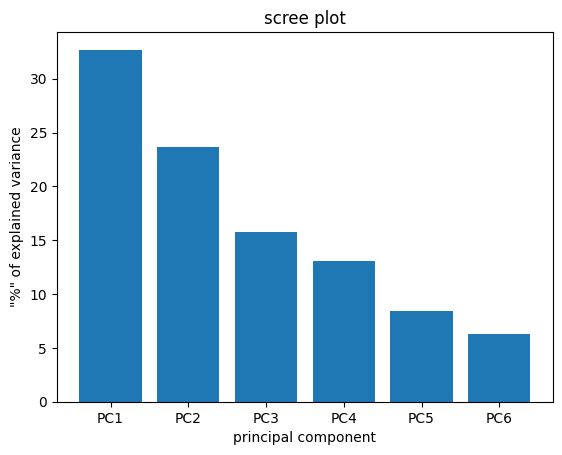

In [4]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('"%" of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()

In [5]:
per_var

array([32.7, 23.7, 15.8, 13.1,  8.4,  6.3])